###Data Quality Monitoring & Anomaly Detection Project

In [0]:
import requests
import json
from datetime import datetime
from pyspark.sql import SparkSession
from pyspark.sql.types import *

Define variables

In [0]:
API_KEY = "88b1862508f7780614e4ca6542ef0d32"
CITIES = ["Johannesburg","Cape Town","Durban","London","Hong Kong","Rome","Amsterdam","San Francisco","Paris","New York","Sydney","Barcelona","Berlin","Seoul","Kuala Lumpur","Dubai","Prague","Tokyo","Instanbul","Shanghai","Los Angeles","Madrid","Toronto","Chicago","Vienna","Seattle","Milan","Boston","Vancouver","Miami"]
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITIES}&appid={API_KEY}&units=metric"
records = []

Fetch the data from the API

In [0]:
for CITY in CITIES:
    URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"
    response = requests.get(URL)

    if response.status_code == 200:
        weather_data = response.json()
        #converting weather data into a list
        if "list" in weather_data and weather_data["list"]:
            for entry in weather_data["list"]:
                record = {
                    city": CITY,
                    "timestamp": entry["dt_txt"],
                    "temperature": entry["main"]["temp"],
                    "humidity": entry["main"]["humidity"],
                    "pressure": entry["main"]["pressure"],
                    "wind_speed": entry["wind"]["speed"],
                    "weather": entry["weather"][0]["description"]
                    }
                records.append(record)
        else: 
            print(f"No forecast data found for {CITY}")
    else:
        print(f"Failed to fetch data for {CITY}: {response.status_code}")

Failed to fetch data for Instanbul: 404


Create a schema and Dataframe from all records

In [0]:
schema = StructType([
    StructField("city",StringType(),True),
    StructField("timestamp",StringType(),True),
    StructField("temperature",StringType(),True),
    StructField("humidity",IntegerType(),True),
    StructField("pressure",IntegerType(),True),
    StructField("wind_speed",StringType(),True),
    StructField("weather",StringType(),True),
])

df_bronze = spark.createDataFrame(records,schema=schema)

In [0]:
df_bronze.display()

city,timestamp,temperature,humidity,pressure,wind_speed,weather
Johannesburg,2025-07-16 12:00:00,19.33,43,1020,1.91,clear sky
Johannesburg,2025-07-16 15:00:00,18.75,37,1020,2.41,clear sky
Johannesburg,2025-07-16 18:00:00,16.19,36,1021,2.74,clear sky
Johannesburg,2025-07-16 21:00:00,13.14,36,1022,1.79,clear sky
Johannesburg,2025-07-17 00:00:00,12.02,37,1022,1.96,clear sky
Johannesburg,2025-07-17 03:00:00,11.1,39,1022,1.85,clear sky
Johannesburg,2025-07-17 06:00:00,11.21,37,1023,2.03,clear sky
Johannesburg,2025-07-17 09:00:00,15.7,28,1023,4.16,clear sky
Johannesburg,2025-07-17 12:00:00,17.89,25,1020,4.14,clear sky
Johannesburg,2025-07-17 15:00:00,17.26,27,1020,3.07,clear sky


####Connect and transfer Bronze Layer data to PostgreSQL

In [0]:
jdbc_url_bronze = "jdbc:postgresql://ep-yellow-haze-a8suj96t-pooler.eastus2.azure.neon.tech:5432/Data_Quality_Monitoring_Anomaly_DetectionDB?sslmode=require"

df_bronze.write \
    .format("jdbc")\
        .option("url",jdbc_url_bronze)\
            .option("dbtable","WeatherDataBronze")\
                .option("user","neondb_owner")\
                    .option("password","npg_gIjCOkvw9t5h")\
                        .option("driver","org.postgresql.Driver")\
                            .mode("overwrite")\
                                .save()

#### Data Cleaning (Silver Layer)

In [0]:
from pyspark.sql.functions import *

Convert timestamp string to Spark TimestampType

In [0]:
df_silver = df_bronze.withColumn("timestamp", to_timestamp("timestamp"))

For the City ID

In [0]:
from pyspark.sql.functions import dense_rank
from pyspark.sql.window import Window

window_spec = Window.orderBy("city")
df_silver = df_silver.withColumn("city_id", dense_rank().over(window_spec))

Add derived fields

In [0]:
df_silver = df_silver.withColumn("month",month(col("timestamp")))\
    .withColumn("year",year("timestamp"))\
        .withColumn("wind_speed_kmh", col("wind_speed") * 3.6) \
            .drop("wind_speed") \
                .withColumnRenamed("wind_speed_kmh","wind_speed")\
                    .wwithColumn("row_id", monotonically_increasing_id()) #Unique ID

Preview the cleaned Dataframe

In [0]:
df_silver.display()

city,timestamp,temperature,humidity,pressure,weather,city_id,month,year,wind_speed,row_id
Amsterdam,2025-07-16T12:00:00.000+0000,18.19,89,1013,light rain,1,7,2025,19.62,0
Amsterdam,2025-07-16T15:00:00.000+0000,18.86,82,1013,light rain,1,7,2025,19.728,1
Amsterdam,2025-07-16T18:00:00.000+0000,18.98,78,1014,scattered clouds,1,7,2025,14.328,2
Amsterdam,2025-07-16T21:00:00.000+0000,16.63,93,1016,clear sky,1,7,2025,7.092,3
Amsterdam,2025-07-17T00:00:00.000+0000,15.04,94,1017,clear sky,1,7,2025,6.12,4
Amsterdam,2025-07-17T03:00:00.000+0000,13.22,93,1016,broken clouds,1,7,2025,2.8440000000000003,5
Amsterdam,2025-07-17T06:00:00.000+0000,16.84,76,1017,scattered clouds,1,7,2025,5.364,6
Amsterdam,2025-07-17T09:00:00.000+0000,21.19,47,1018,few clouds,1,7,2025,10.476,7
Amsterdam,2025-07-17T12:00:00.000+0000,22.93,41,1017,scattered clouds,1,7,2025,14.508000000000001,8
Amsterdam,2025-07-17T15:00:00.000+0000,22.59,43,1017,overcast clouds,1,7,2025,13.032,9


###Connect and transfer Silver Layer data to PostgreSQL

In [0]:
 jdbc_url_silver = "jdbc:postgresql://ep-yellow-haze-a8suj96t-pooler.eastus2.azure.neon.tech:5432/Data_Quality_Monitoring_Anomaly_DetectionDB?sslmode=require"

df_silver.write\
    .format("jdbc")\
        .option("url", jdbc_url_silver)\
            .option("dbtable","WeatherDataSilver")\
                .option("user","neondb_owner")\
                    .option("password","npg_gIjCOkvw9t5h")\
                        .option("driver","org.postgresql.Driver")\
                            .mode("overwrite")\
                                .save()


#### Aggregate data by city and day (Gold Layer)

In [0]:
from pyspark.sql import Window
from pyspark.sql.functions import col, mean, stddev
from pyspark.sql.functions import abs


Aggregate data by City and Day of the week
Find the avg for the attributes

In [0]:

df_gold = df_silver.groupBy("city","year","month").agg(
    mean("temperature").alias("avg_temperature"),
    mean("humidity").alias("avg_humidity"),
    mean("pressure").alias("avg_pressure"),
    mean("wind_speed").alias("avg_wind_speed"),
    stddev("temperature").alias("stddev_temperature")
)


Detect anomalies in temperature using z-score

In [0]:
window_spec = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

df_gold = df_gold.withColumn(
    "z_score_temperature",
    (col("avg_temperature") - mean("avg_temperature").over(window_spec)) / 
    stddev("avg_temperature").over(window_spec)
)

Flag anomalies

In [0]:
df_gold = df_gold.withColumn(
    "is_anomaly_zscore", abs(col("z_score_temperature")) > 2)\
        .withColumn("is_anomaly_rule_based", (col("avg_temperature") > 40) | (col("avg_temperature") < -10))\
            .withColumn("final_anomaly_flag", col("is_anomaly_zscore") | col("is_anomaly_rule_based")
                        )

In [0]:
df_gold.display()

city,year,month,avg_temperature,avg_humidity,avg_pressure,avg_wind_speed,stddev_temperature,z_score_temperature,is_anomaly_zscore,is_anomaly_rule_based,final_anomaly_flag
Johannesburg,2025,7,13.569999999999999,42.15,1025.2,8.946900000000001,3.154795291826924,-1.7159582178372181,false,false,false
Durban,2025,7,19.1385,67.2,1024.125,16.799400000000002,2.572240916658729,-0.7224099592288825,false,false,false
London,2025,7,20.133,67.55,1008.425,11.390400000000001,4.040356166072237,-0.544968324464406,false,false,false
Cape Town,2025,7,13.684500000000003,72.8,1022.65,13.354200000000006,1.6365973926537414,-1.6955287887969632,false,false,false
Hong Kong,2025,7,29.439250000000005,80.875,997.15,14.195699999999997,1.1573718846970404,1.1154803568095142,false,false,false
Rome,2025,7,27.57725,70.45,1017.8,7.7120999999999995,4.015910017571455,0.7832568033339417,false,false,false
Amsterdam,2025,7,18.935500000000008,71.4,1009.825,11.725200000000001,3.702700989194862,-0.7586298203220826,false,false,false
San Francisco,2025,7,15.217499999999998,80.9,1014.2,16.4916,1.7628891641643856,-1.422006389506926,false,false,false
New York,2025,7,26.257499999999993,62.8,1014.325,14.0994,3.040327875368637,0.5477831004878689,false,false,false
Sydney,2025,7,12.292250000000001,66.725,1019.2,11.576700000000002,3.067328652769795,-1.9439381563191787,false,false,false


Databricks visualization. Run in Databricks to view.

### Connect and transfer data to PostgreSQL

In [0]:
jdbc_url = "jdbc:postgresql://ep-yellow-haze-a8suj96t-pooler.eastus2.azure.neon.tech:5432/Data_Quality_Monitoring_Anomaly_DetectionDB?sslmode=require"

df_gold.write \
    .format("jdbc") \
        .option("url", jdbc_url) \
            .option("dbtable", "WeatherDataGold") \
                .option("user", "neondb_owner") \
                    .option("password", "npg_gIjCOkvw9t5h") \
                        .option("driver", "org.postgresql.Driver") \
                            .mode("overwrite") \
                                .save()


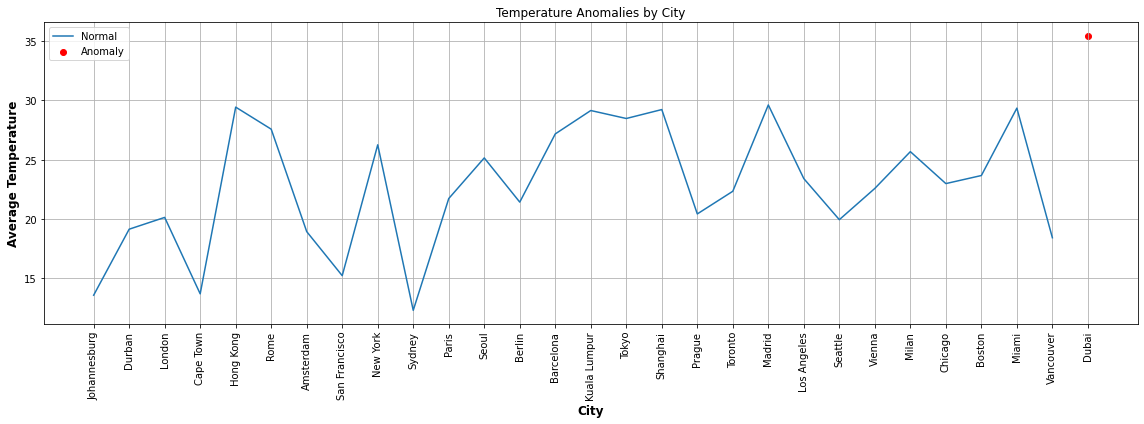

In [0]:
import matplotlib.pyplot as plt

#Convert Spark DataFrame to Pandas DataFrame
df_pd = df_gold.toPandas()

#Filter based on anomaly flag
normal = df_pd[df_pd["final_anomaly_flag"] == 0]
anomaly = df_pd[df_pd["final_anomaly_flag"] == 1]

#Plotting
plt.figure(figsize=(16,6))
plt.plot(normal["city"], normal["avg_temperature"], label="Normal")
plt.scatter(anomaly["city"], anomaly["avg_temperature"], color='red', label="Anomaly")
plt.xlabel("City", fontsize=12, fontweight='bold')
plt.ylabel("Average Temperature", fontsize=12, fontweight='bold')
plt.legend()
plt.xticks(rotation=90) #rotating the city names vertically
plt.title("Temperature Anomalies by City")
plt.grid(True)
plt.tight_layout() #adjust layout to avoid clipping
plt.show()
